# Star Wars Survey

In this project we look into a dataset from FiveThirtyEight revolving around the Star Wars movie franchise. The goal is to try and answer the question of which movie of the franchise people think is best. 
The dataset itself is a collection of peoples responses to a survey revolving around this question. 

In [96]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [97]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [98]:
star_wars['RespondentID'] = pd.notna(star_wars['RespondentID'])
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,False,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,True,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,True,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,True,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


So far we have read in the data to get a look at what we are working with. We can see that some of the column headers need cleaning. 

We first change the name of the responses to certain columns from yes/no to a bool (true/false) using a mapping function.

Following this, we also change the title of columns where people checked a box and where they didn't. Instead of the column showing the movie name or a NaN value we map it to show True/False for all of the movie titles. 

In [99]:
yes_no = {"Yes": True, "No": False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [100]:
true_false = {"Star Wars: Episode I  The Phantom Menace": True,
             "Star Wars: Episode II  Attack of the Clones": True,
             "Star Wars: Episode III  Revenge of the Sith": True,
             "Star Wars: Episode IV  A New Hope": True,
             "Star Wars: Episode V The Empire Strikes Back": True,
             "Star Wars: Episode VI Return of the Jedi": True,
             np.NaN: False}
columns = star_wars.columns[3:9]
for col in columns:    
    star_wars[col] = star_wars[col].map(true_false)

In [101]:
new_titles = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", 'Unnamed: 4':"seen_2",'Unnamed: 5':"seen_3",'Unnamed: 6':"seen_4",'Unnamed: 7':"seen_5",'Unnamed: 8':"seen_6"}
star_wars = star_wars.rename(columns=new_titles)

In [102]:
star_wars = star_wars[1:]
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
new_col_names = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':"ranking_ep_1","Unnamed: 10": "ranking_ep_2",'Unnamed: 11':"ranking_ep_3", 'Unnamed: 12':"ranking_ep_4", 'Unnamed: 13':"ranking_ep_5","Unnamed: 14":"ranking_ep_6"}
star_wars = star_wars.rename(columns=new_col_names)

Here we have changed the name of the columns themselves to make reading the data more intuitive. This will help us when plotting and comparing the data. 

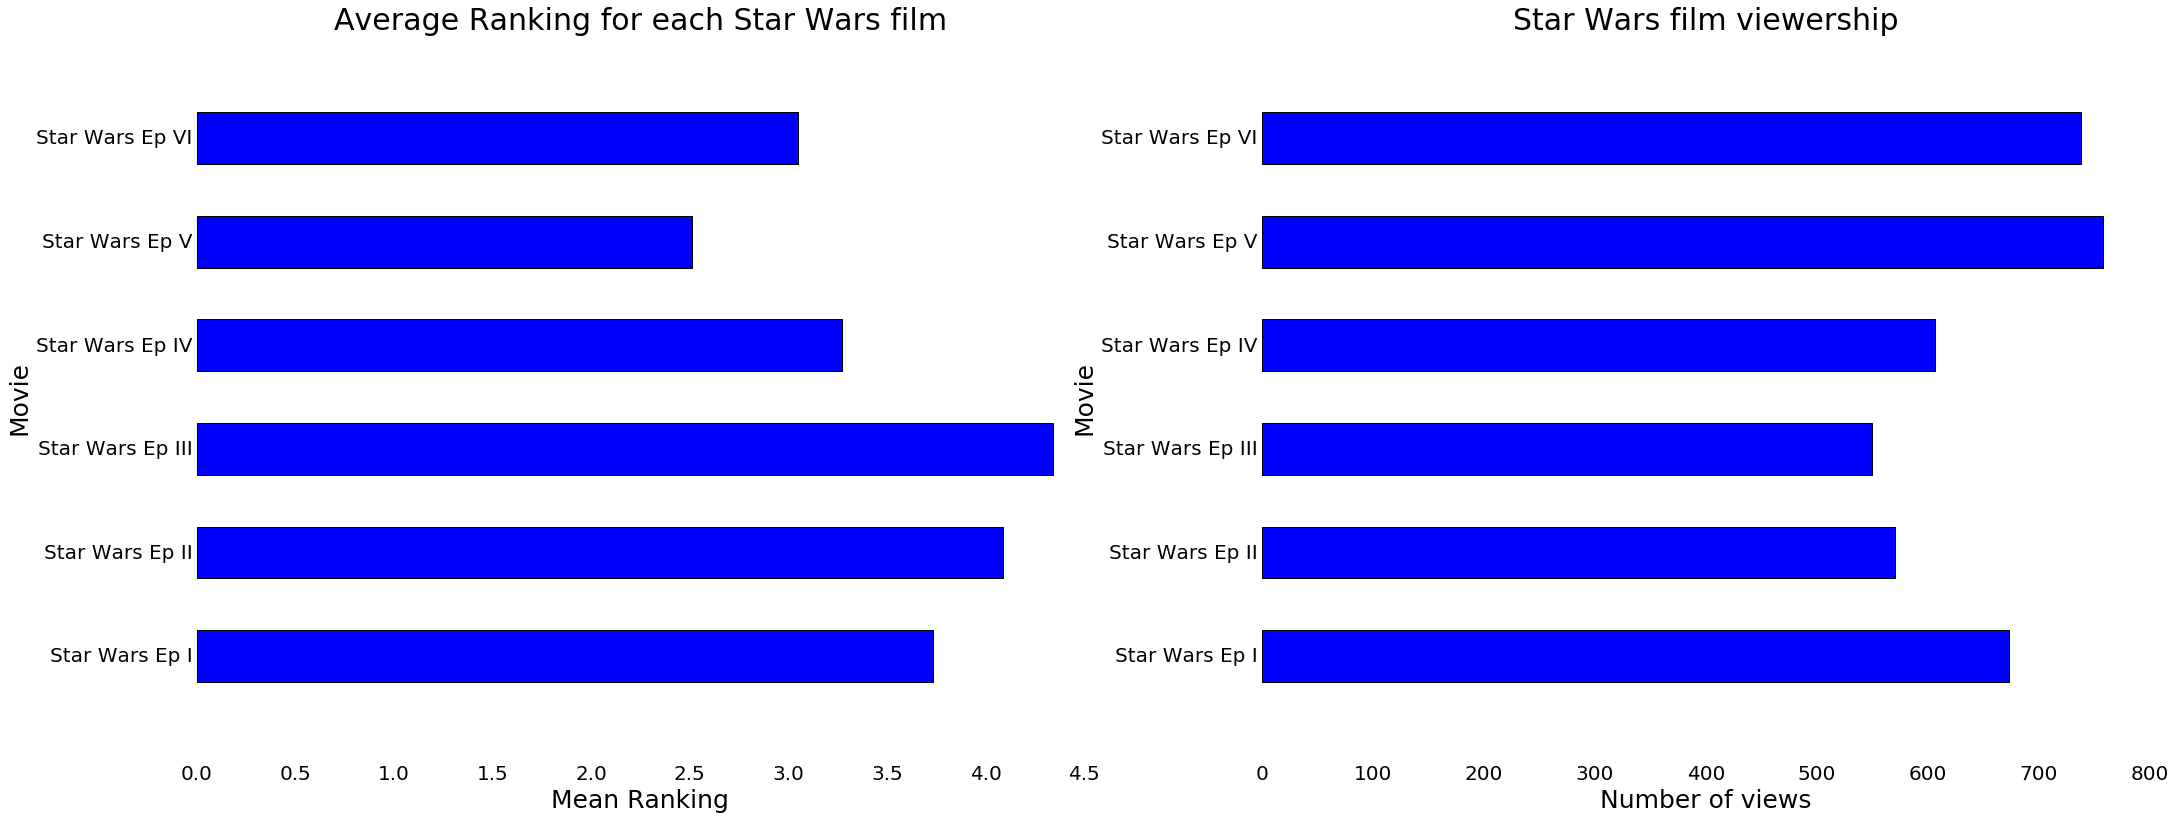

In [133]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

columns = star_wars.columns[9:15]
names = ['Star Wars Ep I', 'Star Wars Ep II', 'Star Wars Ep III', 'Star Wars Ep IV', 'Star Wars Ep V', 'Star Wars Ep VI']
bar_widths = star_wars[columns].mean(skipna=True)
bar_positions = arange(6) + 0.75
tick_positions = range(1,7)

columnss = star_wars.columns[3:9]

bar_widths1 = star_wars[columnss].sum()
bar_positions1 = arange(6) + 0.75
tick_positions1 = range(1,7)

fig = plt.figure(figsize=(35,13))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.barh(bar_positions, bar_widths, 0.5 )
ax1.set_yticks(tick_positions)
ax1.set_yticklabels(names, rotation=0)
ax1.set_xlabel("Mean Ranking",fontdict = {'fontsize' : 25})
ax1.set_ylabel("Movie",fontdict = {'fontsize' : 25})
ax1.set_title("Average Ranking for each Star Wars film", fontdict = {'fontsize' : 30})
ax1.spines['right'].set_visible(False)
for key, spine in ax1.spines.items():
    spine.set_visible(False)
ax1.tick_params(bottom='off',left='off',right='off',top='off')

ax2.barh(bar_positions1, bar_widths1, 0.5)
ax2.set_yticks(tick_positions1)
ax2.set_yticklabels(names, rotation=0)
ax2.set_xlabel("Number of views", fontdict = {'fontsize' : 25})
ax2.set_ylabel("Movie", fontdict = {'fontsize' : 25})
ax2.spines['right'].set_visible(False)
for key, spine in ax2.spines.items():
    spine.set_visible(False)
ax2.tick_params(bottom='off',left='off',right='off',top='off')

plt.title('Star Wars film viewership', fontdict = {'fontsize' : 30})

plt.show()

Once we have cleaned the columns and renamed them, we can plot them to get a better look at the data. 

The average mean ranking of each film is rated on the scale of the best being the lowest numerical ranking and the worst being the highest numerical ranking.
We can see that the best rated film is the 5th, and it coorelates with the highest number of views. On the other end of the spectrum, the "worst" rated film is the 3rd, and it coorelates with the lowest number of views. 

In [105]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

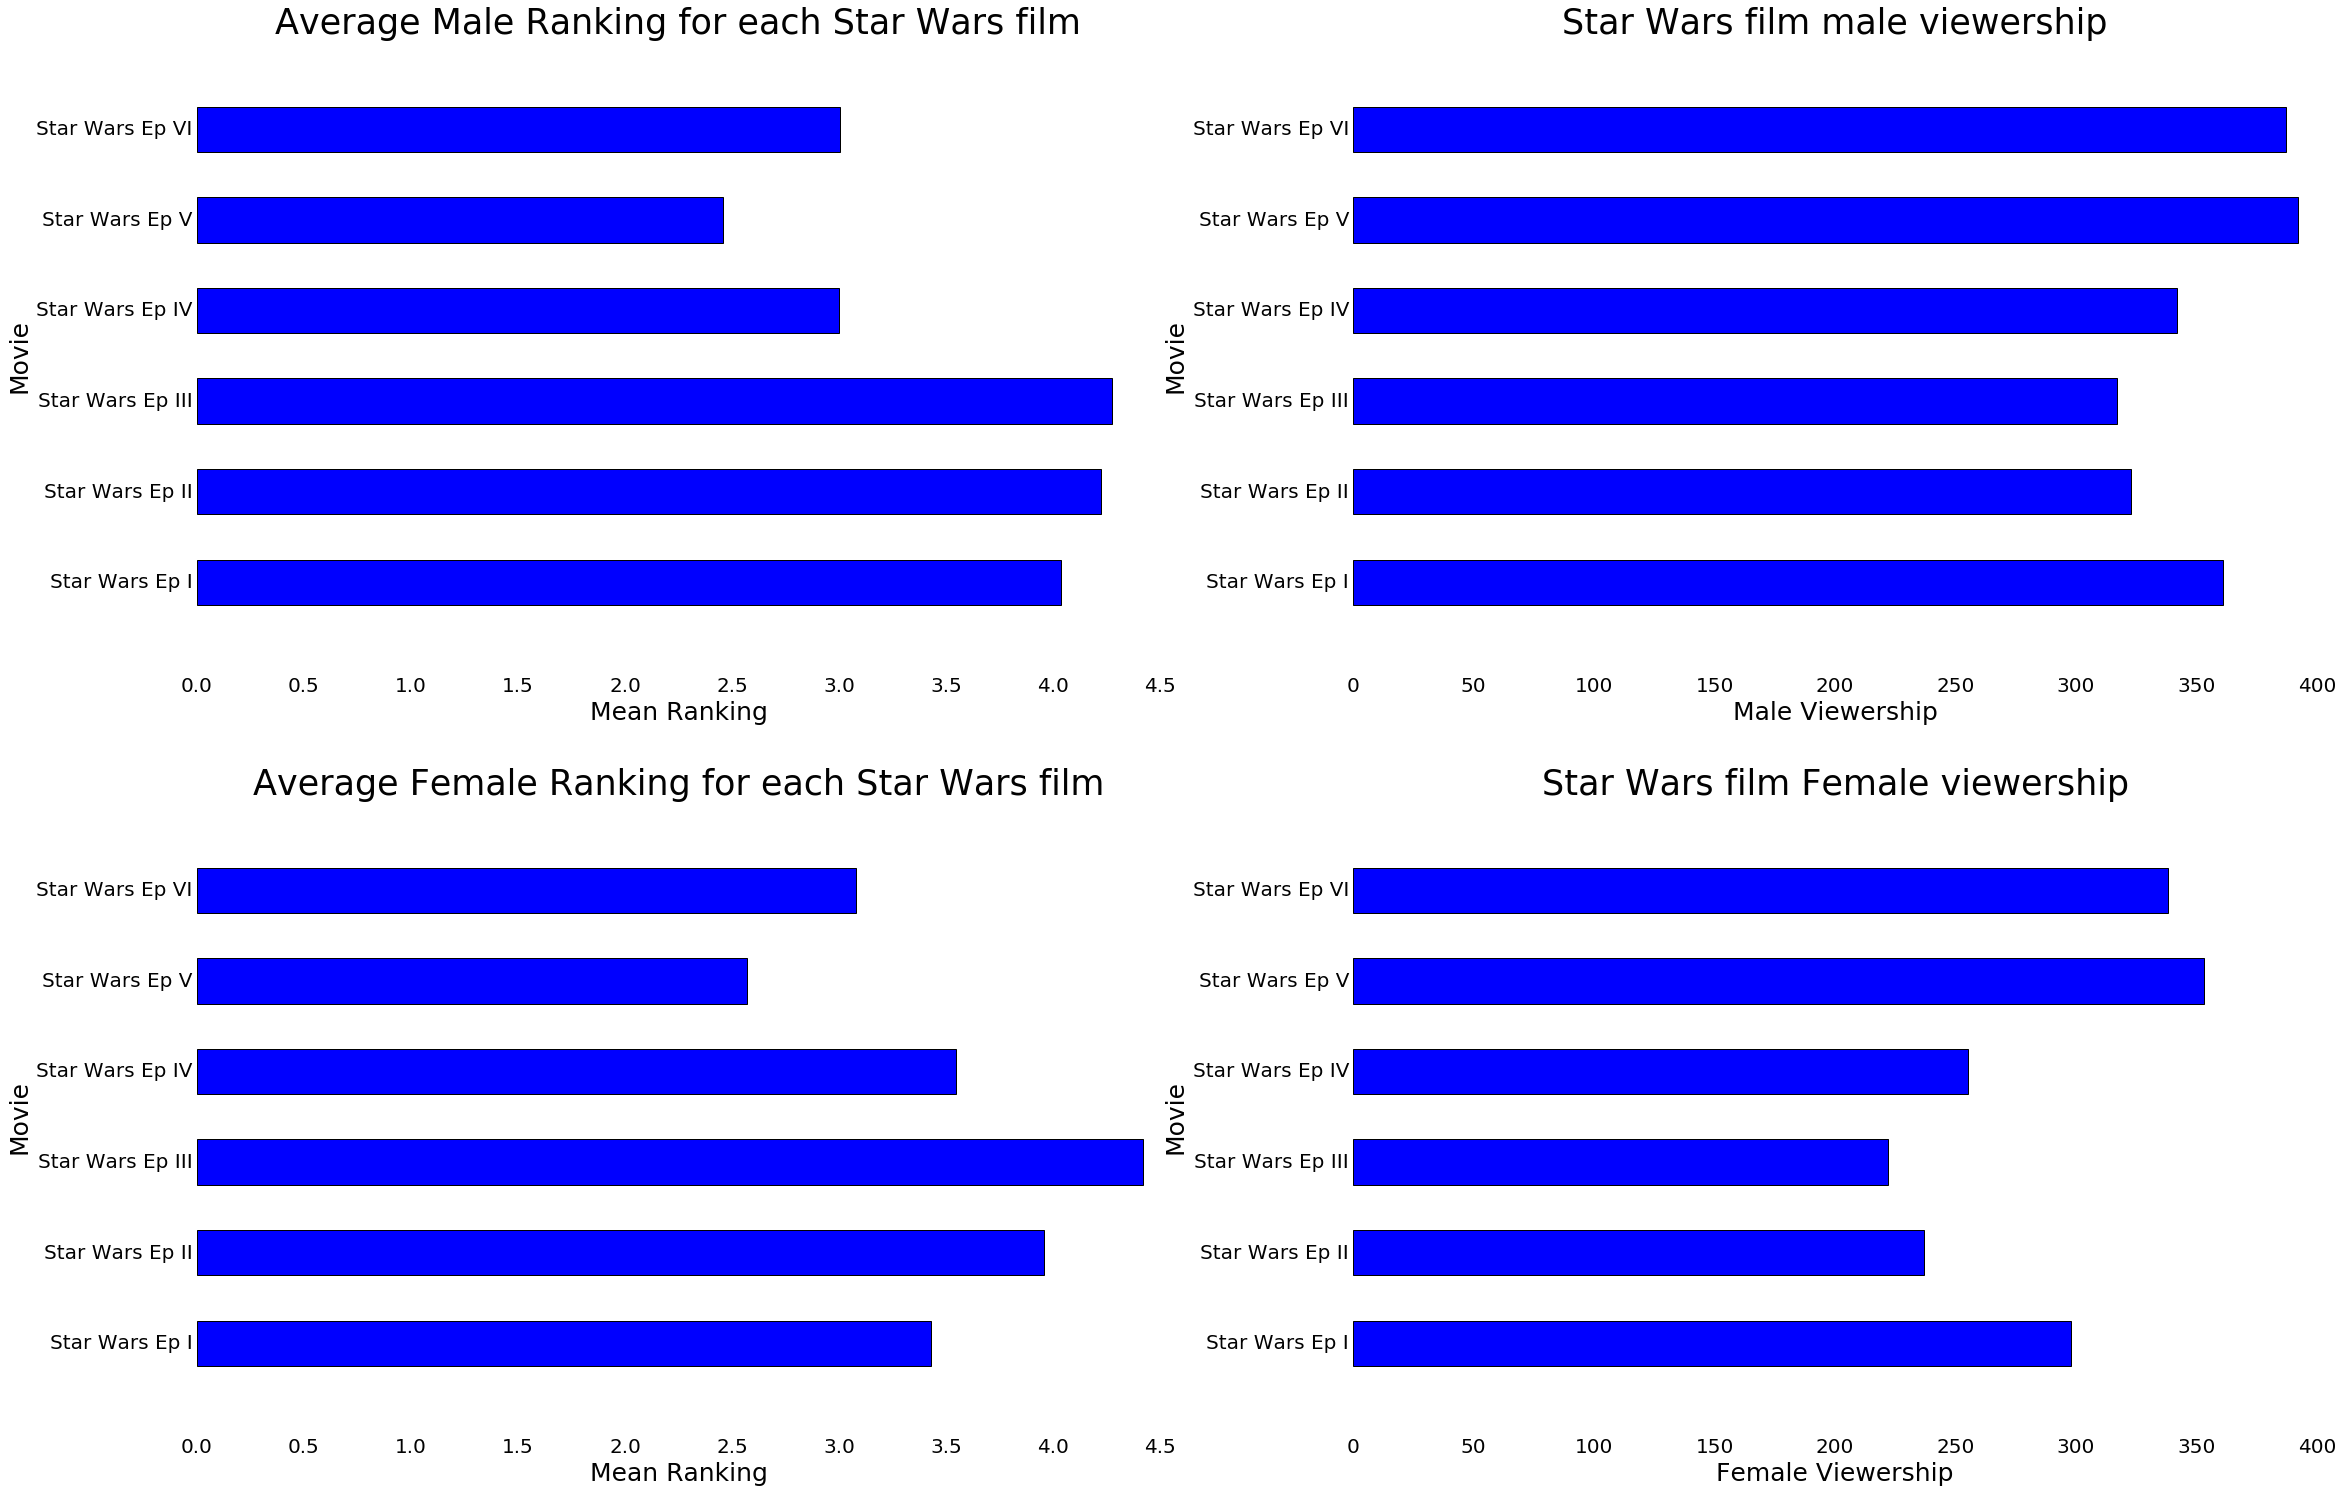

In [149]:
columns = males.columns[9:15]
names = ['Star Wars Ep I', 'Star Wars Ep II', 'Star Wars Ep III', 'Star Wars Ep IV', 'Star Wars Ep V', 'Star Wars Ep VI']
bar_widths = males[columns].mean(skipna=True)
bar_positions = arange(6) + 0.75
tick_positions = range(1,7)

columnss = males.columns[3:9]

bar_widths1 = males[columnss].sum()
bar_positions1 = arange(6) + 0.75
tick_positions1 = range(1,7)

fig = plt.figure(figsize=(38,25))
ax1 = fig.add_subplot(2,2,1)
ax1.barh(bar_positions, bar_widths, 0.5 )
ax1.set_yticks(tick_positions)
ax1.set_yticklabels(names, rotation=0)
ax1.set_xlabel("Mean Ranking",fontdict = {'fontsize' : 25})
ax1.set_ylabel("Movie",fontdict = {'fontsize' : 25})
ax1.set_title("Average Male Ranking for each Star Wars film",fontdict = {'fontsize' : 35})
for key, spine in ax1.spines.items():
    spine.set_visible(False)
ax1.tick_params(bottom='off',left='off',right='off',top='off')


ax2 = fig.add_subplot(2,2,2)
ax2.barh(bar_positions1, bar_widths1, 0.5)
ax2.set_yticks(tick_positions1)
ax2.set_yticklabels(names, rotation=0)
ax2.set_xlabel("Male Viewership",fontdict = {'fontsize' : 25})
ax2.set_ylabel("Movie",fontdict = {'fontsize' : 25})
ax2.set_title("Star Wars film male viewership",fontdict = {'fontsize' : 35})
for key, spine in ax2.spines.items():
    spine.set_visible(False)
ax2.tick_params(bottom='off',left='off',right='off',top='off')

columns2 = females.columns[9:15]
names = ['Star Wars Ep I', 'Star Wars Ep II', 'Star Wars Ep III', 'Star Wars Ep IV', 'Star Wars Ep V', 'Star Wars Ep VI']
bar_widths2 = females[columns].mean(skipna=True)
bar_positions2 = arange(6) + 0.75
tick_positions2 = range(1,7)

ax3 = fig.add_subplot(2,2,3)
ax3.barh(bar_positions2, bar_widths2, 0.5 )
ax3.set_yticks(tick_positions2)
ax3.set_yticklabels(names, rotation=0)
ax3.set_xlabel("Mean Ranking",fontdict = {'fontsize' : 25})
ax3.set_ylabel("Movie",fontdict = {'fontsize' : 25})
ax3.set_title("Average Female Ranking for each Star Wars film",fontdict = {'fontsize' : 35})
for key, spine in ax3.spines.items():
    spine.set_visible(False)
ax3.tick_params(bottom='off',left='off',right='off',top='off')

columns3 = females.columns[3:9]

bar_widths3 = females[columnss].sum()
bar_positions3 = arange(6) + 0.75
tick_positions3 = range(1,7)


ax4 = fig.add_subplot(2,2,4)
ax4.barh(bar_positions3, bar_widths3, 0.5)
ax4.set_yticks(tick_positions3)
ax4.set_yticklabels(names, rotation=0)
ax4.set_xlabel("Female Viewership",fontdict = {'fontsize' : 25})
ax4.set_ylabel("Movie",fontdict = {'fontsize' : 25})
ax4.set_title("Star Wars film Female viewership",fontdict = {'fontsize' : 35})
for key, spine in ax4.spines.items():
    spine.set_visible(False)
ax4.tick_params(bottom='off',left='off',right='off',top='off')
plt.show()

If we split up the data further based on gender, we can get a look at how men and women each view the films. We can see that the rankings of the films between men and women for the most part share the same trends. However, we can see that certain films, such as episode 3, have a much higher(less favorable) rating from women. 
We can also see that in terms of total viewership, more males tend to watch the movies than females.